# Titanic Exploration

What categories of passengers were most likely to survive the Titanic disaster?

## Quick look at the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Observations:

- The "Cabin" attribute has a lot of NAN values, so for the purpose of this analysis I won't use it.
- Passenger ID, Name, and Ticket will also be dropped since they don't seem like they would have an effect on survival.
- I will need to deal with the NAN values for Age and Embarked.

In [4]:
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Analysis

In [5]:
data['Survived'].mean()

0.3838383838383838

Only 38% of passengers aboard survived.

### Pclass

Pclass represents the socio-economic class of each passenger. 1 denotes upper class, 2 middle class, 3 lower class.

In [6]:
pclass = data.groupby("Pclass")['Survived']

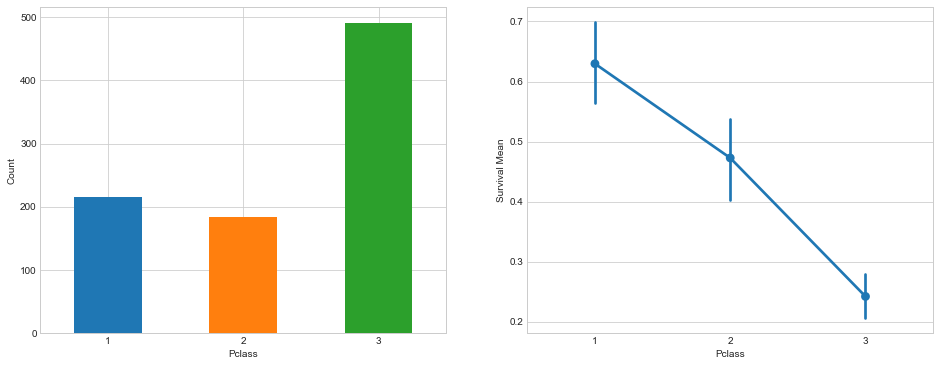

In [7]:
plt.subplots(1, 2, figsize=(16,6))

plt.subplot(1,2,1)
pclass.count().plot('bar')
plt.ylabel('Count')
plt.xticks(rotation=0)


plt.subplot(1,2,2)
sns.pointplot('Pclass', 'Survived', data=data, size=6)
plt.ylabel('Survival Mean')

plt.show()

Observations:

- The majority of passengers aboard the titanic were in Pclass_3, i.e. low class citizens. These folks had the lowest survival rate at <30%.
- Conversely, first class (Pclass_1) passengers had an average survival rate of >60%. 
- There is an obvious relationship between being of higher class and having a higher chance of surviving.

Since Pclass is a categorical feature, I'm going to separate it into dummy variables:

In [8]:
pclass_dummies = pd.get_dummies(data["Pclass"], prefix="Pclass")
data = data.join(pclass_dummies)
data.drop("Pclass", axis=1, inplace=True)
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,S,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,female,26.0,0,0,7.9250,S,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,1


### Age

Age has a lot of null values, so I will fill these in with randomly generated numbers within one standard deviation away from the mean.

In [9]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()
age_nan_count = data['Age'].isnull().sum()
print("""Mean: {}\nStandard Deviation: {}\nNumber of Null Values: {}
            """.format(age_mean, age_std, age_nan_count))

fill_ages = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_nan_count) # range from floor to ceiling

Mean: 29.69911764705882
Standard Deviation: 14.526497332334044
Number of Null Values: 177
            


C:\Users\Will\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


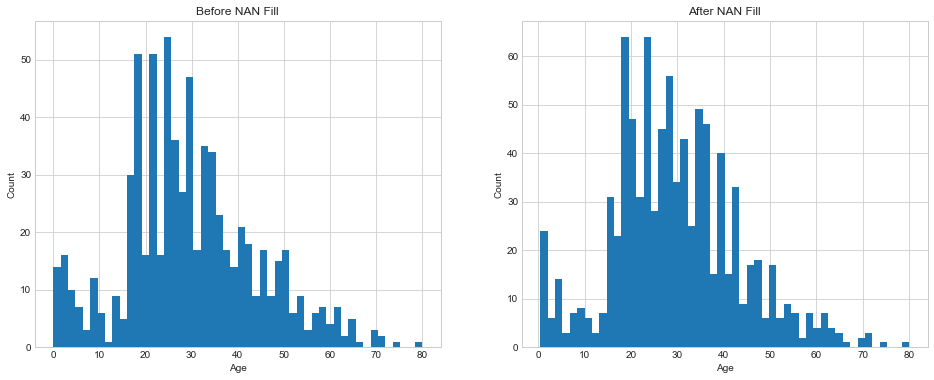

In [10]:
plt.subplots(1,2, figsize=(16,6))

# Before Age Adjustment
plt.subplot(1,2,1)
data['Age'].dropna().astype(int).hist(bins=50)
plt.title('Before NAN Fill')
plt.xlabel('Age')
plt.ylabel('Count')

# After Age Adjustment
data['Age'][np.isnan(data['Age'])] = fill_ages
plt.subplot(1,2,2)
data['Age'].hist(bins=50)
plt.title('After NAN Fill')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

Now that the null values have been dealt with, let's see how many people survived and died in each age bin:

C:\Users\Will\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


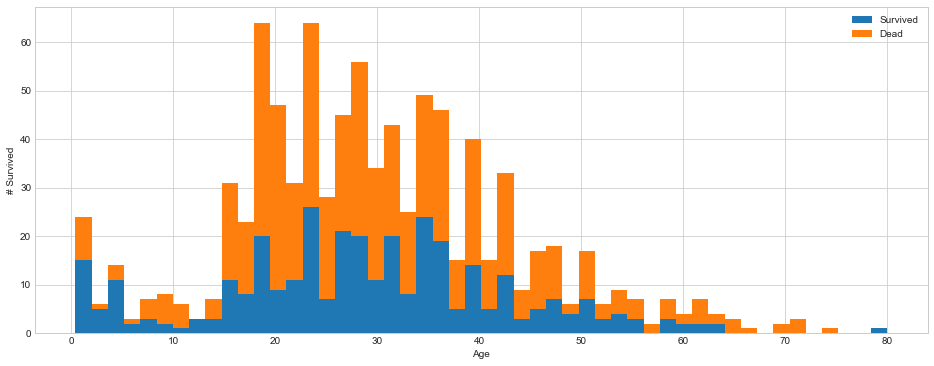

In [11]:
plt.figure(figsize=(16,6))
plt.hist([data['Age'].loc[data['Survived'] == 1],
          data['Age'].loc[data['Survived'] != 1]],
         stacked=True, label=['Survived', 'Dead'], bins=50)
plt.ylabel('# Survived')
plt.xlabel('Age')
plt.legend()
plt.show()
        

Observations:

- A lot more young children (<10 y.o) survived than died.
- More older-aged people near the right tail of the distribution died than survived.
- There is a big cluster of death between ages 20-40, which makes sense considering the mean age is 29 and the average survival rate across all passengers was 38%.

### Sex

In [12]:
sex = data.groupby('Sex')['Survived']

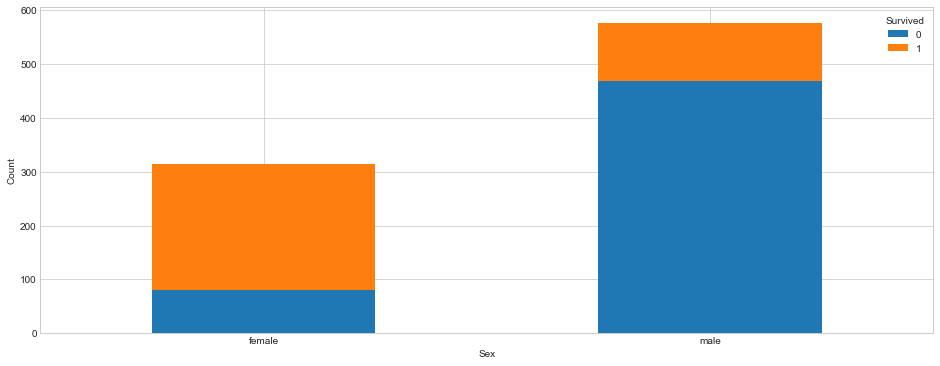

In [13]:
sex.value_counts().unstack().plot(kind='bar', stacked=True, figsize=(16,6))
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

There were more men aboard the titanic, and they were much more likely to die than women.

Young people (< 16 y.o) had a higher rate of survival, so we're going to create a new attribute "Person" that encompasses men, women, and childen.

In [14]:
def get_child(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

data['Person'] = data[['Age', 'Sex']].apply(get_child, axis=1)
data.drop('Sex', axis=1, inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Person
0,0,22.0,1,0,7.2500,S,0,0,1,male
1,1,38.0,1,0,71.2833,C,1,0,0,female
2,1,26.0,0,0,7.9250,S,0,0,1,female
3,1,35.0,1,0,53.1000,S,1,0,0,female
4,0,35.0,0,0,8.0500,S,0,0,1,male


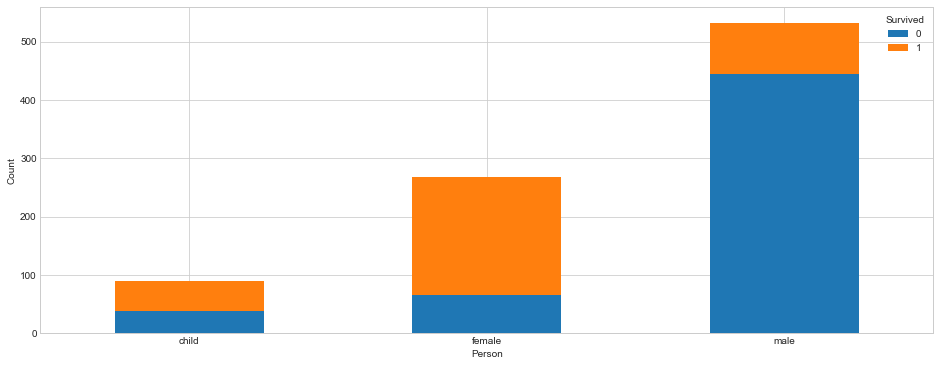

In [15]:
person = data.groupby('Person')['Survived']

person.value_counts().unstack().plot(kind='bar', stacked=True, figsize=(16,6))
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [16]:
person.mean()

Person
child     0.561798
female    0.758364
male      0.165103
Name: Survived, dtype: float64

Women and children had much better odds than men - so let's simplify the person category to be "Woman or Child":

In [17]:
def woman_or_child(person):
    return 1 if person != "male" else 0

data["Woman or Child"] = data["Person"].apply(woman_or_child)
data.drop("Person", axis=1, inplace=True)
data.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Woman or Child
0,0,22.0,1,0,7.2500,S,0,0,1,0
1,1,38.0,1,0,71.2833,C,1,0,0,1
2,1,26.0,0,0,7.9250,S,0,0,1,1
3,1,35.0,1,0,53.1000,S,1,0,0,1
4,0,35.0,0,0,8.0500,S,0,0,1,0


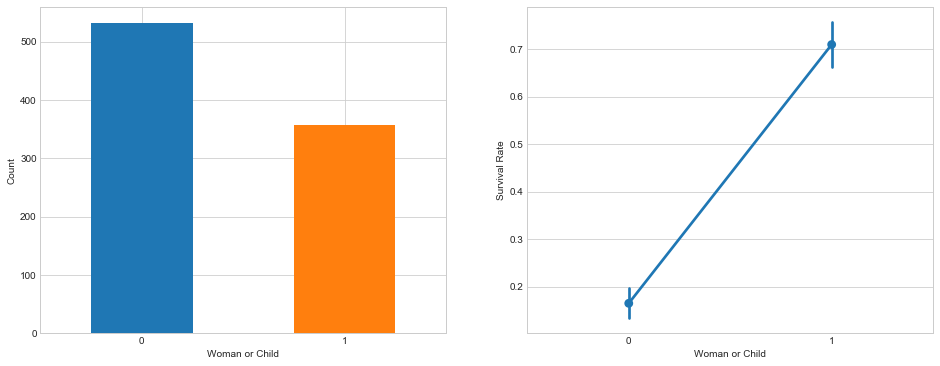

In [18]:
plt.subplots(1,2, figsize=(16,6))

plt.subplot(1,2,1)
data["Woman or Child"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Woman or Child")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.pointplot("Woman or Child", "Survived", data=data)
plt.ylabel("Survival Rate")
plt.show()

Women and children had a combined survival rate of 70%>, while men had <20%.

### SibSp and Parch

SibSp and Parch both have to do with familial relationships passengers had on the ship (Sibling or Spouse, Parent or Child). I'm going to aggregate these into a single feature, Family Size, to measure the impact that having family onboard had on one's survival. Perhaps there could have been cases of parents saving children, spouses making sacrifices for one another (e.g. Leo in the movie), etc... 

In [19]:
data["Family Size"] = data["SibSp"] + data["Parch"] + 1 # the + 1 counts for the passenger themselves
data.drop(["SibSp", "Parch"], axis=1, inplace=True)

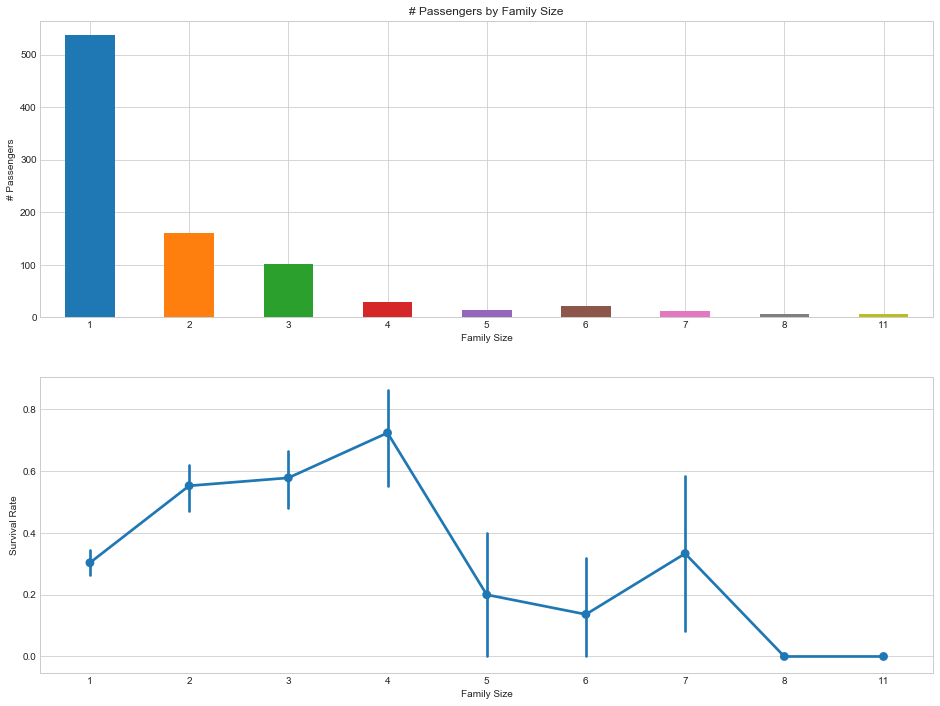

In [20]:
plt.subplots(2,1, figsize=(16,12))

plt.subplot(2,1,1)
data["Family Size"].value_counts(sort=False).plot(kind="bar")
plt.ylabel("# Passengers")
plt.xlabel("Family Size")
plt.xticks(rotation=0)
plt.title("# Passengers by Family Size")

plt.subplot(2,1,2)
sns.pointplot("Family Size", "Survived", data=data)
plt.ylabel("Survival Rate")

plt.show()


Observations:

- Most passengers travelled on their own, and their survival rate seems to be fairly in line with the ship's average.
- Family sizes from 2-4 had much better survival rates, but since there were far fewer of these sizes on the ship these rates have a larger margin of error.
- Larger family sizes had low survival rates but again this comes with high variance, making these results less definitive.
- Having a medium sized family seemed to be helpful, but larger (poorer?) families seemed to suffer for it.

### Fare

Let's first see the distribution of passenger fares:

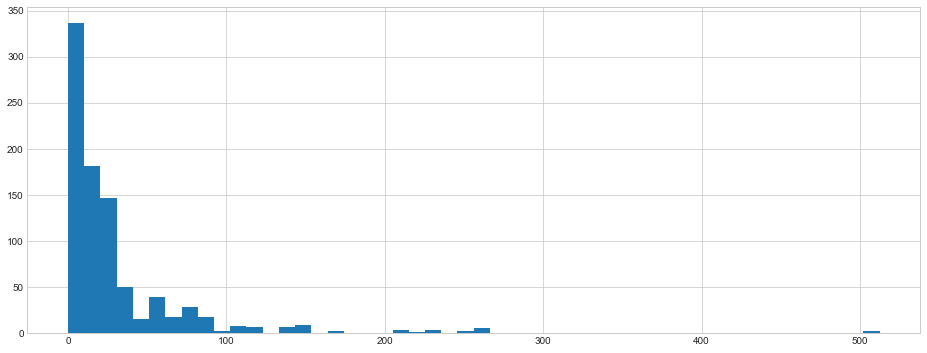

In [21]:
data["Fare"].hist(figsize=(16,6), bins=50)

Since fare and age are the only two numerical variables in the dataset, let's see a scatterplot of the two:

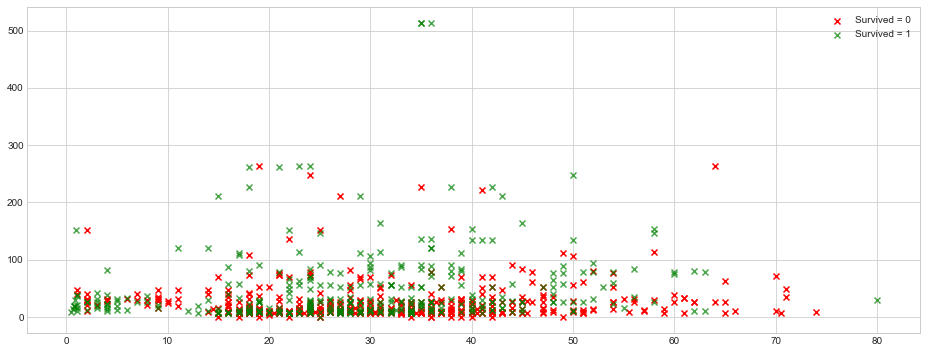

In [22]:
plt.figure(figsize=(16,6))
plt.scatter(data["Age"].loc[data['Survived'] == 0],
           data["Fare"].loc[data['Survived'] == 0], c='r', label="Survived = 0", alpha=1, marker='x')
plt.scatter(data["Age"].loc[data['Survived'] == 1],
           data["Fare"].loc[data['Survived'] == 1], c='g', label="Survived = 1", alpha=0.7, marker='x')
            # Lowered alpha to allow bottom layer points to be slightly more visible
plt.legend()

Observations:

- There's a big cluster of low fare passengers aged 20-50, where the relative number of dead and survived passengers seems equal.
- As passenger fare increases the number of survived passengers increases as well (i.e. they're positively correlated).
- The majority of passengers who paid a fare of at least 100 survived.

### Embarked

Embarked represents where each passenger boarded the ship from.

C = Cherbourg, Q = Queenstown, S = Southampton

There are two missing values for the category, so I'll just fill them with the mode.

In [23]:
data["Embarked"].mode()[0]

'S'

In [24]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived          891 non-null int64
Age               891 non-null float64
Fare              891 non-null float64
Embarked          891 non-null object
Pclass_1          891 non-null uint8
Pclass_2          891 non-null uint8
Pclass_3          891 non-null uint8
Woman or Child    891 non-null int64
Family Size       891 non-null int64
dtypes: float64(2), int64(3), object(1), uint8(3)
memory usage: 44.5+ KB


Now let's check the characteristics of these cities with a pivot table:

In [25]:
data.pivot_table(index="Embarked")

,Age,Family Size,Fare,Pclass_1,Pclass_2,Pclass_3,Survived,Woman or Child
Embarked,,,,,,,,
C,30.636429,1.750000,59.954144,0.505952,0.101190,0.392857,0.553571,0.464286
Q,28.772727,1.597403,13.276030,0.025974,0.038961,0.935065,0.389610,0.545455
S,29.552245,1.981424,27.243651,0.199690,0.253870,0.546440,0.339009,0.368421


Passengers from Cherbourg had just over a 50% chance in surviving. This is likely due to the fact that they were higher status passengers, i.e. many were from Pclass_1 and paid higher fairs. Almost half of the Cherbourg passengers were either women or children as well.

Queenstown and Southampton passengers had substantially lower chances of survival. They were lower class people, with 93% and 54% Pclass_3 passengers respectively. Southampton has the worst survival rate, which likely was a result of almost 2/3rds of their passengers being men.

Once again, I'll create dummy variables since Embarked is categorical:

In [26]:
embarked_dummies = pd.get_dummies(data["Embarked"], prefix="Embarked")
data = data.join(embarked_dummies)
data.drop("Embarked", axis=1, inplace=True)
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Woman or Child,Family Size,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,2,0,0,1
1,1,38.0,71.2833,1,0,0,1,2,1,0,0
2,1,26.0,7.9250,0,0,1,1,1,0,0,1
3,1,35.0,53.1000,1,0,0,1,2,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,1


## Correlations to Survival

To check each variable's correlation to the survival rate I'll calculate the standard correlation coefficient. This measures the linear relationship between variables on a scale from 1 to -1. The closer to 1, the more positive linear relationship two variables have (as x increases y increases); the closer to -1, the more negative (as x increases y decreases).

In [27]:
corr_matrix = data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived          1.000000
Woman or Child    0.548806
Pclass_1          0.285904
Fare              0.257307
Embarked_C        0.168240
Pclass_2          0.093349
Family Size       0.016639
Embarked_Q        0.003650
Age              -0.051489
Embarked_S       -0.149683
Pclass_3         -0.322308
Name: Survived, dtype: float64

We see that being a woman or child is most strongly correlated to surviving, providing solid evidence for the "woman and children first" philosophy when disaster strikes. Related to this, passenger age has a slight negative correlation with survival (perhaps because the older a passenger is, the less likely they are a child).

Passenger class - as well as Fare, which can be interpreted as a proxy for class - also is a strong deriminant of whether someone survived or not, most evidently showing that passengers of the lowest class were much more likely to not survive. Passengers from Cherbourg (mostly upper class and half woman and children) have a moderate positive correlation with surviving; passengers from Southampton (many lower class men) have a moderately negative correlation with survival.

Family Size and being from Queensland have essentially no relation to one's survival rate.

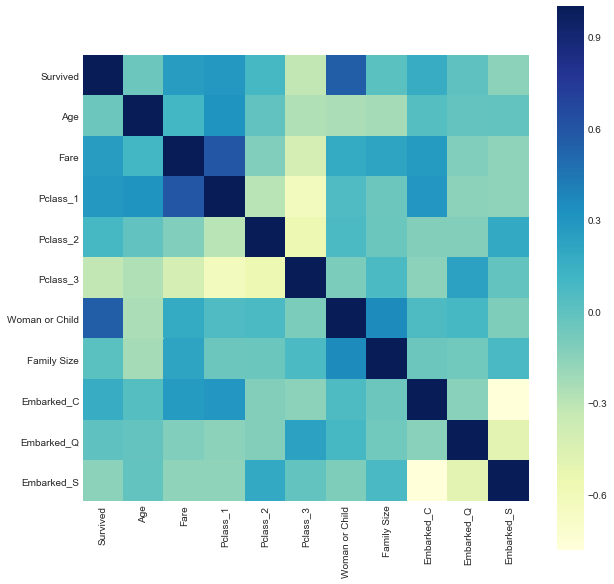

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=1, square=True, cmap="YlGnBu")
plt.show()